<img style='float: right' src="http://stem.uhh.hawaii.edu/images/262931_10150265188993752_3537337_n.jpg" width="200" height="40"> <br> <br>

# AC 2017 Intro to EE Day 4
## Description of notebook lesson

Today we're looking at using python to solve equations like the ones from our first day evaluation exam. This is known as sybmolic math since we won't be using actual values, but will be using *symbols* instead. The SymPy module is a useful tool that we will utilize in solving these equations. 

# Symbolic Math
## Rational numbers (fractions)

**Symbolic Math** is the term used to describe solving equations with symbols instead of values. In the past, if we wanted to add fractions, we had to define the variables as floats and add them. But the output was still a float, not in fractional form. 

In [71]:
a = 1./2.
b = 2./3.
c = a+b
print c

1.16666666667


Now let's see the result in fractional form

In [72]:
import sympy
#dir sympy

In [73]:
a = sympy.Rational(1,2) # 1/2
b = sympy.Rational(2,3) # 2/3
c = a+b
print "c = %s " % c

c = 7/6 


We can evaluate the symbolic fractional form

In [74]:
print "c = %s " % c.evalf()

c = 1.16666666666667 


# Constants

SymPy also has values for constants such as `pi`.

In [75]:
a = (2*sympy.pi)/16
print "a = %s and evaluates to %f" % (a, a.evalf())

a = pi/8 and evaluates to 0.392699


Notice how it automatically simplifies our fraction! That's nice. Maybe we can find rational values of `cos` and `sin`. If we tried using the `math` package we would get.

In [76]:
import math
a = math.cos(math.pi/4)
print "The cos(pi/4) = %f" % a

The cos(pi/4) = 0.707107


In symbolic math, this would be

In [77]:
b = sympy.cos(sympy.pi/4)
print "The cos(pi/4) = %s and evaluates to %f" % (b, b.evalf())

The cos(pi/4) = sqrt(2)/2 and evaluates to 0.707107


# Exercises

## Ex 0
Find two functions from the sympy package. One that finds the **Fourier Transform** of an expression and one that finds the **Laplace Transform**. You're not going to use them, this is just an excercise of how you might locate functions in a package.

Then find a function that will find the roots of an expression.

Find a function that will multiply two matrices together.

Lastly, find a function that will perform $e^{()}$ (Remember this is called an *exponential*, look for a function whose name has part of the word *`exponential`* in it.


(Write these functions below in the format `package.function()`)

In [78]:
'''sympy.FourierTransform()
sympy.LaplaceTransform()'''

'sympy.FourierTransform()\nsympy.LaplaceTransform()'

In [79]:
'''sympy.RootOf()'''

'sympy.RootOf()'

In [80]:
'''sympy.MatMul()'''

'sympy.MatMul()'

In [81]:
'''sympy.exp()'''

'sympy.exp()'

## Ex 1
Express 45/33 + 56/110 + 39/80 in fractional form

In [82]:
a = sympy.Rational(45,33)
b = sympy.Rational(56/110)
c = sympy.Rational(39/80)
print a+b+c

15/11


## Ex 2
The `sympy.I` is a symbolic constant for $i=\sqrt{-1}$ which is an imaginary number. Write a line of code to evaluate a symbolic complex exponential with w=pi/2 (Evaluate $e^{i\frac{\pi}{2}}$)

In [83]:
sympy.exp(sympy.I*sympy.pi/2)

I

## Ex 3
What is the $\sin(\frac{7\pi}{4})$?

In [84]:
sympy.sin(7*sympy.pi/4)

-sqrt(2)/2

## Ex 4
You can specify how many decimal places to evaluate by passing an integer to the `evalf(num_of_dec_places)` function. What is the $\sqrt{2}$ to 50 decimal places?

In [85]:
import math

In [86]:
sympy.sqrt(2).evalf(50)

1.4142135623730950488016887242096980785696718753769

# Symbols
**varaibles** in symbolic math must be declared as a **symbol**. This tells python that it will not be replaced by a number until we want it to be.

In [87]:
x = sympy.Symbol('x')
print 2*x + 3

#This can also be written as
x = sympy.symbols('x')
#which will be useful when we use multiple symbols

2*x + 3


This is really useful when expanding or even factoring and expression. There were a few problems like this on the first day exam.

This code expands $(x+2)(x+4)$

In [88]:
x = sympy.symbols('x')

#Save an expression as a variable
expr = (x+2)*(x+4)

#Expand the expression
sympy.expand(expr)

x**2 + 6*x + 8

This code factors $x^{2} + 6x + 8$

In [89]:
sympy.factor(x**2 + 6*x + 8)

(x + 2)*(x + 4)

We can also tell sympy to simplify an expression. (Warning, this doesn't always produce the result you want, but it can be a useful tool).

For example, let's simplify $\frac{x+x^{2}}{x}$

In [90]:
x = sympy.symbols('x')
expr = (x+x**2)/x

print expr
print sympy.simplify(expr)

(x**2 + x)/x
x + 1


Great. So now we have our expressions. They've been simplified, factored or expanded. So how can we plug in different values of $x$ (*plug 'n chug*)? This is called a **substitution**. We can **substitute** $x$ for a value and evaluate the expression using the function `sympy.subs()`

In [91]:
x = sympy.symbols('x')
expr = (x+2)*(x+4)
expr.subs(x,2) #The first argument is the variable and the second is the value we wish to substitute into it.

24

We can work with multiple variables/symbols as well. Here we are working with the expression $$\big((x^{2} + 32)^{3}\big)\big(y^{3}+10\big)$$

In [92]:
#Declare multiple variables at once
x, y = sympy.symbols('x y')

#Define an expression 
expr = ((x**2)+32)**3 * ((y**3)+10)

#Let (x,y) = (3,4) (you can try to evaluate this by hand if you'd like!) or we can use the computer
print "The expression is", expr

print "At (x,y)=(3,4), this expression =", expr.subs([(x,3), (y,4)])

The expression is (x**2 + 32)**3*(y**3 + 10)
At (x,y)=(3,4), this expression = 5100154


# Plotting

If you remember when we plotted on the first homework assignment and in the last lab, we needed to generate a list of $x$ values and a list of $y$ values to be plotted as $(x,y)$ pairs. Let's do the same thing for our symbolic expressions.

Let's work with the exponential function, $e^{x}$. First off, we need to find a function in the `sympy` package that calculates $e^{x}$. Luckily, we did this earlier and found that `sympy.exp(x)` performs the operation of $e^{x}$.

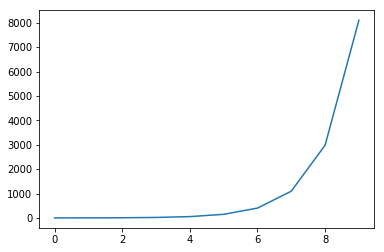

In [93]:
import matplotlib.pyplot as plt

#Define the variable x
x = sympy.symbols('x')

#Define the expression
expr = sympy.exp(x)

#Define our x range and an empty y list
x_vals = range(0,10)
y_vals = []

#Loop through our x values and plug them in to get different y values
for i in x_vals:
        #Plug 'n chug for our x values
        val = expr.subs(x,i)
        
        #Append the result to the y values
        y_vals.append(val)
        
#Plot the x values and the y values
plt.plot(x_vals, y_vals)
plt.show()

Luckily for us, sympy also has a sub-module that automatically plots the symbolic functions.

In [94]:
help(sympy.plotting)

Help on package sympy.plotting in sympy:

NAME
    sympy.plotting

FILE
    /usr/local/lib/python2.7/dist-packages/sympy/plotting/__init__.py

PACKAGE CONTENTS
    experimental_lambdify
    intervalmath (package)
    plot
    plot_implicit
    pygletplot (package)
    tests (package)
    textplot

DATA
    plot_backends = {'default': <class 'sympy.plotting.plot.DefaultBackend...




`PACKAGE CONTENTS` tells us what functions we can call. The `plot` function looks useful.

In [95]:
help(sympy.plotting.plot)

Help on function plot in module sympy.plotting.plot:

plot(*args, **kwargs)
    Plots a function of a single variable and returns an instance of
    the ``Plot`` class (also, see the description of the
    ``show`` keyword argument below).
    
    The plotting uses an adaptive algorithm which samples recursively to
    accurately plot the plot. The adaptive algorithm uses a random point near
    the midpoint of two points that has to be further sampled. Hence the same
    plots can appear slightly different.
    
    Usage
    =====
    
    Single Plot
    
    ``plot(expr, range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with same range.
    
    ``plot(expr1, expr2, ..., range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with different ranges.
    
    ``plot((expr1, range), (expr2, range), ..., **kwargs)``
    
    Range has to be 

So the inputs to the function are `sympy.plotting.plot(expr, range)`. We have an expression, all we need to do is provide a range.

In [96]:
import sympy

#Define the variable x
x = sympy.symbols('x')

#Define the expression
expr = sympy.exp(x)

#Plot the symbolic expression
sympy.plotting.plot(expr, (x,0,9)) #Remember range(0,10) gives values from 0-9

The range in the `sympy` package is a little be different because you also need to specify what variable we want to plot against. Notice that the second parameter is `(x,0,9)` instead of just `(0,9)`.

# Excercises

## Ex 1
$$(x+4)^{2} + x^{3}$$
$$(3x+8x^{2})$$

Multiply the above expressions. Print the muliplication result and then plot them for $x=(0,10)$

In [97]:
x = sympy.symbols('x')

expr1 = (x+4)**2 + x**3
expr2 = (3*x + 8*x**2)

newexpr = sympy.expand(expr1*expr2)

print newexpr

8*x**5 + 11*x**4 + 67*x**3 + 152*x**2 + 48*x


In [98]:
sympy.plotting.plot(newexpr, (x,0,10))

## Ex 2

Give a simplified expression by substituting the first equation into the second expression. Plot for $x=(.5,1)$
$$y=x+4x^{-2}$$
$$(xy + y^{2} + x^{3})$$
(Hint: you only need an $x$ variable, the $y$ will automatically be replaced)

What happens at x=0?

In [99]:
y = x+4*x**-2
x = sympy.symbols('x')

expr = x*y +y**2 +x**3

print expr

x**3 + x*(x + 4/x**2) + (x + 4/x**2)**2


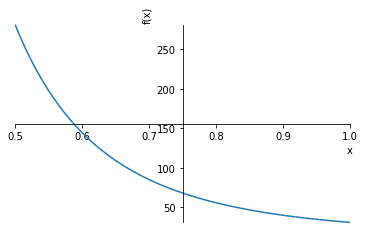

In [100]:
sympy.plotting.plot(expr, (x,0.5,1))

## Derivatives


From lecture, we saw that derivatives are an extremely important tool. To make them even more useful, we can use `sympy` to give us the derivative of an expression.

Let's start with an expression we've seen before, $f(x)=x^{2}$.

In [101]:
import sympy

#Create the variable x
x = sympy.symbols('x')

# Define our expression as f
f = x**2
print f

x**2


When we take a derivative, we need to take it **with respect to** a variable. The variable in this case is $x$ so we take it with respect to $x$

$$\frac{d}{dx}f(x) = \frac{d}{dx}x^{2}$$

The variable we want to differentiate with respect to is the argument to `diff()`

In [102]:
f.diff(x)

2*x

The derivative of $f=x^{2}$ is $2x$. In mathetical formulation, this is equivalent to $$\frac{d}{dx}f(x)=\frac{d}{dx}x^{2} = 2x$$

Sometimes, we want to take the derivative with respect to $x$ multiple times. Taking the derivative twice with respect to $x$, is called a **second derivative**. This might look like $$\frac{d}{dx}\frac{d}{dx}f(x) = \frac{d^{2}}{dx^{2}}f(x)$$

We can perform this operation by inputting 2 arguments into the `diff()` function as such

In [103]:
f.diff(x, x)

2

This means that $$\frac{d^{2}}{dx^{2}}f(x) = \frac{d^{2}}{dx^{2}}(x^{2}) = \frac{d}{dx}(2x) = 2$$

## Multiple Variables

In many cases, we'll have more than one variable in our function or expression. In this case, we take the derivative **with respect to** one of the variables and *treat the other as a constant*. This is the definition of a **partial derivative**. When only one variable is present, the *partial* is the same as the *ordinary*. In reality, the `sympy.diff()` function takes partial derivatives.

The partial derivative of $f(x)$ **with respect to $x$** is denoted by $$\frac{\partial}{\partial x}f(x)$$.

Similarly, the partial derivative of $f(x,y)$ **with respect to $x$** is denoted by $$\frac{\partial}{\partial x}f(x,y)$$

Remember, this means we *take the derivative **with respect to $x$** and treat $y$ as a constant*

Let's take a look at some partial differentiation.

Take $$f(x,y) = (xy + x^{2}y^{2})$$

First we want to take the **partial derivative** with respect to $x$.

$$\frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}(xy + x^{2}y^{2})$$

We can do this *exactly* as we did the examples above
1. defining our variables, $x$ and $y$, and our expresssion, $f(x) = xy + x^{2}y^{2}$
2. take the derivative **with respect to $x$** (`.diff(x)`)

In [104]:
import sympy

#Define our variables
x, y = sympy.symbols('x y')

#Define our expression
f = x*y + (x**2)*(y**2)

print f.diff(x)

2*x*y**2 + y


In math terms, this is equivalent to 

$$\frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}(xy + x^{2}y^{2}) = 2xy^{2} + y$$

Similarly, we can take the partial derivative **with respect to $y$**

In [105]:
print f.diff(y)

2*x**2*y + x


In math terms, this is equivalent to 

$$\frac{\partial}{\partial y}f(x,y) = \frac{\partial}{\partial y}(xy + x^{2}y^{2}) = 2yx^{2} + x$$


We also talked **second derivatives**, or taking a derivative twice with respect to $x$, these have the same connotation as single variable second derivatives and are denoted as

$$\frac{\partial^{2}}{\partial x ^{2}}f(x,y)$$

However, there's nothing stopping us from taking the partial derivative with respect to $x$ followed by the partial derivative with respect to $y$. This would look like

$$\frac{\partial}{\partial x}\frac{\partial}{\partial y}f(x,y) = \frac{\partial^{2}}{\partial x \partial y}f(x,y) = \frac{\partial^{2}}{\partial x \partial y}(xy + x^{y})$$

First, let's do this the intuitive way. Take the partial derivative **with respect to $x$** then **with respect to $y$**.

In [106]:
import sympy

#Define our variables
x, y = sympy.symbols('x y')

#Define our expression
f = x*y + (x**2)*(y**2)

#Take the derivative with respect to x
f1 = f.diff(x)

#Take the derivative with respect to y
f2 = f1.diff(y)

print f2

4*x*y + 1


Now let's do it a quicker way. The order of the arguments to `diff()`, corresponds to the partial derivative we want to take. The above code can be shortened to

In [107]:
import sympy

#Define our variables
x, y = sympy.symbols('x y')

#Define our expression
f = x*y + (x**2)*(y**2)

#Take the derivative with respect to x and then y
print f.diff(x,y)

4*x*y + 1


You get the same answer.

Now let's try $$\frac{\partial^{2}}{\partial y \partial x}f(x,y)$$

which means we need to take the derivative with respect to $y$ and then $x$.

In [108]:
import sympy

#Define our variables
x, y = sympy.symbols('x y')

#Define our expression
f = x*y + (x**2)*(y**2)

#Take the derivative with respect to x and then y
print f.diff(y,x)

4*x*y + 1


# Exercises

## Ex 1

What is the derivative of $x^{3}$ with respect to $x$?

In [109]:
x = sympy.symbols('x')

f = x**3

print f.diff(x)

3*x**2


## Ex 2

What is the second derivative of $x^{3}$ with respect to $x$?

In [110]:
print f.diff(x,x)

6*x


## Ex 3

What is the $\frac{d}{dx}f(x)$ where $f(x)=x^{3}+3^{x+2x^{2}}$

In [111]:
f = x**3 + 3**(x+2*(x**2))

print f.diff(x)

3**(2*x**2 + x)*(4*x + 1)*log(3) + 3*x**2


## Ex 4

What is the derivative of $x^{2}y^{3}$?
1. with respect to $x$
2. with respect to $y$

In [112]:
x, y = sympy.symbols('x y')

f = (x**2)*(y**3)

print f.diff(x)
print f.diff(y)

2*x*y**3
3*x**2*y**2


## Ex 5

Find the following

$\frac{\partial}{\partial x}(x^{2} + y^{x})$

$\frac{\partial}{\partial y}(x^{2} + y^{x})$

$\frac{\partial^2}{\partial x \partial y}(x^{2} + y^{x})$

In [113]:
x, y = sympy.symbols('x y')

f = x**2 + y**x

print f.diff(x)
print f.diff(y)
print f.diff(x,y)

2*x + y**x*log(y)
x*y**x/y
y**x*(x*log(y) + 1)/y


## Integrals

One way to think about integrals is that integrals are the *inverse* of derivatives. The integral of $f(x)$ **with respect to $x$** is denoted by 

$$\int f(x)dx$$

The $dx$ signifies that we differentiated **with respect to $x$** and therefore we must integrate **with respect to $x$**.

Let's start with integrating $2x$. In math terms, this looks like

$$\int 2x dx$$

The `sympy` function `integrate()` will come in handy. Just like the `diff()` function, `integrate()` takes a parameter specifying what variable to integrate **with respect to**. For the function above, we want to integrate **with respect to $x$**

In [114]:
x = sympy.symbols('x')
expr = 2*x
print expr.integrate(x)

x**2


In math terms, this means

$$\int 2x dx = x^{2}$$

This makes sense since we saw in the differentiation section that

$$\frac{d}{dx}x^{2} = 2x$$

And just like differentiation, we can **double integrate**. Double integration means integrating with respect to one term and then to another.

Let's use $2x + 3y$ as our expression. We wish to solve

$$\int \int (2x+3y)dxdy$$

First we integrate with respect to $x$, then we integrate with respect to $y$. The `integrate()` function, works exactly like the `diff()` function meaning we pass the variables of integration in the order we wish to integrate. In the example above, we will call `integrate(x,y)`

In [115]:
x, y  = sympy.symbols('x y')
expr = 2*x + 3*y
print expr.integrate(x, y)

x**2*y + 3*x*y**2/2


In math terms, this means

$$\int \int (2x+3y)dxdy = x^{2}y + \frac{3xy^{2}}{2}$$


## Exercises

## Ex 1

What is the integral of 3x?

In [116]:
x, y = sympy.symbols('x y')

f = 3*x
print f.integrate(x)

3*x**2/2


## Ex 2

What is $$\int (4x + 2x^{3}) dx$$

In [117]:
x, y = sympy.symbols('x y')

f = 4*x + 2*x**3
print f.integrate(x)

x**4/2 + 2*x**2


## Ex 3

What is $$\int \int (3xy + 2x^{2}) dx dy$$

In [118]:
x, y = sympy.symbols('x y')

f = 3*x*y + 2*x**2
print f.integrate(x,y)

2*x**3*y/3 + 3*x**2*y**2/4


# Equations

Up until now, we've seen a lot of useful tools in simplify or expanding expressions. The `sympy` package also allows us to solve equations for $x$.

We'll start with some simple equations

$$x + 4 = 7$$

If we do this by hand, we can see that $x = 3$, but let's see what `sympy` can do. The function, `sympy.Eq()` will allow us to define an equation. Either side of the equation is input as parameter separated by a comma. The equation above would be `sympy.Eq(x+4,7)`.

In [119]:
import sympy
x = sympy.symbols('x')
eq = sympy.Eq(x+4,7)
print eq

Eq(x + 4, 7)


Now that we have an equation, let's solve it using `sympy.solve(eq,x)`. The first argument is the equation we wish to solve and the second argument is the variable we want to solve for.

In [120]:
print sympy.solve(eq,x)

[3]


We can also solve for multiple variables, but remember, *you need at least as many equations as you have variables*. When we have multiple equations, we call this a **system of equations**. Let's try to solve the following **system of equations**

$$x + y = 4$$
$$y + 2x = 5$$

Remember we want to end up with a value for $x$ and a value for $y$.

In [121]:
import sympy
x, y = sympy.symbols('x y')
eq1 = sympy.Eq(x+y, 4)
eq2 = sympy.Eq(y+2*x, 5)
sympy.solve([eq1, eq2], [x,y])

{x: 1, y: 3}

This means that for the above equations to both be true, we need $x$ to equal 1 and $y$ to equal 3.

## Exercises

## Ex 1

Sove the following equations or system of equations

1. $x+4 = 2x$
2. $x + y = 3y$ and $y^{2} = 4$
3. $x^{2} + 4yx + y^{2} = 2$ and $y=4x$

In [122]:
x, y = sympy.symbols('x y')

#1
eq1 = sympy.Eq(x+4,2*x)
print sympy.solve(eq1,x)
#2
eq2 = sympy.Eq(x+y,3*y)
eq3 = sympy.Eq(y**2,4)
print sympy.solve([eq2,eq3],[x,y])
#3
eq4 = sympy.Eq(x**2+4*y*x+y**2,2)
eq5 = sympy.Eq(y,4*x)
print sympy.solve([eq4,eq5],[x,y])


[4]
[(-4, -2), (4, 2)]
[(-sqrt(66)/33, -4*sqrt(66)/33), (sqrt(66)/33, 4*sqrt(66)/33)]


# Differential Equations

We saw in the wave equation that we needed to guess a function, $u(t,x)$ and plug it into an equation with derivatives to see if the equality held. 

Sometimes, we can start with the equation and solve for the unknown function. ***The function is the unknown and we want to solve for it.***

To be able to solve for a function, we need to tell python that a function is *symbolic*.

## Symbolic Functions

First we can say that $f(x)$ and $g(x)$ are functions. The input $x$ can be any symbolic variable we've already defined.

In [123]:
import sympy
x, y = sympy.symbols('x y')

#Tell python that f and g are functions
f, g = sympy.symbols('f g', cls=sympy.Function)
print f(x)
print f(y)

f(x)
f(y)


Great. Now we can take the derivative of the function with respect to any variable we've already defined. We can also integrate a function with respect to any variable we've already defined.

In [124]:
print f(x).diff(x)
print f(y).diff(y)

print f(x).integrate(x)
print f(y).integrate(y)

Derivative(f(x), x)
Derivative(f(y), y)
Integral(f(x), x)
Integral(f(y), y)


We won't get values yet because we haven't specified what $f$ and $g$

## Differential Equations

**Differential Equations** are equations in which we are ***given the derivative of a function and we need to find the function***

This may seem complicated, so let's work through an example.

Let's say we know that $$\frac{\partial}{\partial x}f(x) = 1$$

We've been told the derivative of $f(x)$ with respect to x and need to find an $f(x)$ that satisfies this. Since integrals and derivatives are inverses, we can try taking the integral of both sides, OR, we can use python

First we define our symbolic function, $f$, and our symbolic variable $x$.

In [125]:
import sympy

#Define our variable
x = sympy.symbols('x')

#Define our symbolic function
f = sympy.symbols('f', cls=sympy.Function)

Now that we have our symbols, let's define the left and right hand side of the equation

In [126]:
#Take the derivative with respect to x
left_hand_side = f(x).diff(x)

right_hand_side = 1

Now let's use the `sympy.Eq()` function we used earlier to create a symbolic equation and solve them.

In [127]:
eq = sympy.Eq(left_hand_side, right_hand_side)
f_sol = sympy.dsolve(eq, f(x))
print f_sol

Eq(f(x), C1 + x)


Translating this into math terms is

$$f(x) = x + c$$

where c is some constant.

## Exercises

## Ex 1

Take the derivative of the result of the last example.

In [128]:
c = sympy.symbols('c')
lefthand = f(x)
righthand = x + c
eq = sympy.Eq(lefthand.diff(x),righthand.diff(x))
print eq

Eq(Derivative(f(x), x), 1)


## Ex 2

Find $f(x)$ given the following differential equations. Remember, $f'(t)\triangleq\dot{f}\triangleq\frac{\partial}{\partial t}f(t)$

1. $f'(t) = 5f(t) - 3$
2. $\dot{f} = 7(f)^{2}t^{3}$
3. $g'(z) = 4g(z) - g(z)^{2}$

In [129]:
t, z = sympy.symbols('t z')
f, g = sympy.symbols('f g', cls=sympy.Function)
#1
left1 = f(t).diff(t)
right1 = 5*(f(t))-3
eq1 = sympy.Eq(left1,right1)
print "number one: ", sympy.dsolve(eq1, f(t))

number one:  Eq(f(t), C1*exp(5*t)/5 + 3/5)


In [130]:
#2
left2 = left1
right2 = 7*(f(t)**2)*t**3
eq2 = sympy.Eq(left2,right2)
print 'number two: ', sympy.dsolve(eq2, f(t))

number two:  Eq(f(t), -4/(C1 + 7*t**4))


In [131]:
#3
left3 = g(z).diff(z)
right3 = 4*g(z)-g(z)*2
eq3 = sympy.Eq(left3,right3)
print 'number three: ', sympy.dsolve(eq3, g(z))

number three:  Eq(g(z), C1*exp(2*z))


## Additional Exercises

## Ex 1

Complete as many of the problems from the first day evaluation exam using sympy.

In [132]:
#33
x, y = sympy.symbols('x y')
f = sympy.symbols('f', cls=sympy.Function)
f = x*y
print f.diff(x,y)

1


In [133]:
#34
expr = ((x**2)*(y**2)+(y**3))*(x-(x*y))
f = sympy.expand(expr)
print f.diff(y)

-3*x**3*y**2 + 2*x**3*y - 4*x*y**3 + 3*x*y**2


In [134]:
#35
f = x**2 + y*x + y**2
print f.diff(y,y,x)

0


In [135]:
#36
expr = (x**2 + y**2)/(x*y)
f = sympy.expand(expr)
print f.diff(y,x)

-(y**(-2) + x**(-2))


In [136]:
#37  (dy/dx) = -3y + e^-2x

expr = -3*y + sympy.exp(-2*x)
eq = sympy.Eq(y, expr.integrate(x))
print eq

Eq(y, -3*x*y - exp(-2*x)/2)


In [149]:
#38 x*(dy/dx) +2y = 2x^2 - 3x
x, y = sympy.symbols('x y')
f = sympy.symbols('f', cls=sympy.Function)
left = x*f(x).diff(x) + 2*f(x)
right = 2*x**2-3*x
eq = sympy.Eq(left,right)
print sympy.dsolve(eq,f(x))

Eq(f(x), C1/x**2 + x**2/2 - x)


In [138]:
#39 2dx +3dy = 0
# (dy/dx)= -2/3
right = sympy.Rational(-2,3)
left = y
print sympy.Eq(left, right.integrate(x))

Eq(y, -2*x/3)


In [150]:
#40 
right = -3*x**2*y**2+1
left = 2*x*y**3
eq = sympy.Eq(left.integrate(x),right.integrate(y))
print sympy.solve(eq,y)

[0, -sqrt(2)/(2*x), sqrt(2)/(2*x)]


## Ex 2

Prove that the complex exponential form of $u(t,x) = sin(kx - wt)$ satisfies the wave equation. $$\frac{\partial^{2} u(t,x)}{\partial t^{2}} = c^{2}\frac{\partial^{2} u(t,x)}{\partial x^{2}}$$

In [140]:
import sympy
t, x, k, w, c = sympy.symbols('t x k w c')
u = sympy.symbols('u', cls=sympy.Function)
w = k/c
k = w/c
c = w/k

In [141]:
u = ((sympy.exp(sympy.I*((k*x)-(w*t))))-(sympy.exp(-1*sympy.I*((k*x)-(w*t)))))/(2*sympy.I)

In [142]:
#u = sympy.sin((k*x)-(w*t))

In [143]:
left = (u.diff(t,t))
right = (c**2)*(u.diff(x,x))
print left
print right

I*k**2*(-exp(I*k*(t - x/c)/c) + exp(-I*k*(t - x/c)/c))/(2*c**2)
I*k**2*(-exp(I*k*(t - x/c)/c) + exp(-I*k*(t - x/c)/c))/(2*c**2)


In [144]:
left == right

True

## Ex 3

Find 5 other equations that satisfy the wave equation.

In [145]:
import sympy
t, x, k, w, c = sympy.symbols('t x k w c')
u = sympy.symbols('u', cls=sympy.Function)
w = k/c
k = w/c
c = w/k

In [146]:
left = (u(t,x).diff(t,t))
right = (c**2)*(u(t,x).diff(x,x))
eq = sympy.Eq(left,right)
print sympy.dsolve(eq, u(t,x))

ValueError: dsolve() and classify_ode() only work with functions of one variable, not u(t, x)

Copyright 2017 Grady Kestler & Kyle Adriany

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.